# Stock Residual Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'BAC' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def residual_risk(stock_returns, market_returns):
    m = np.matrix([stock_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    rr = stock_returns.std() - beta
    return rr

Text(0, 0.5, 'Residual Risk')

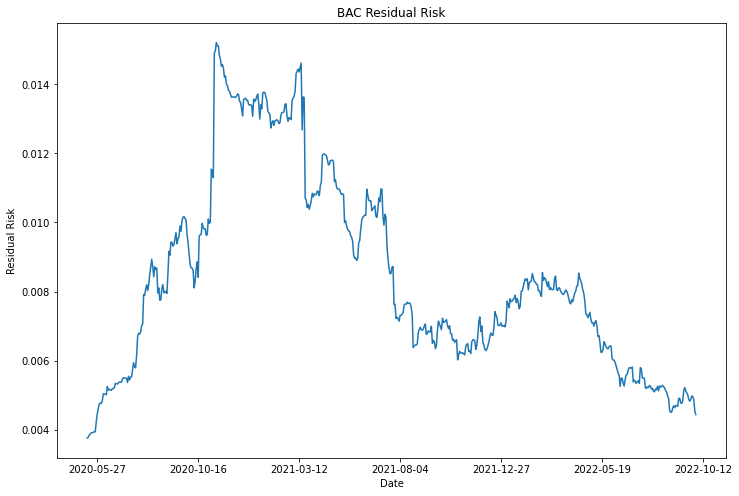

In [6]:
# Compute the running Residual Risk
running = [residual_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Residual Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Residual Risk')
plt.xlabel('Date')
plt.ylabel('Residual Risk')

In [7]:
stock_var = residual_risk(stocks_returns, market_returns)
stock_var

0.006369771388098373

In [8]:
running = [residual_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.0037560141523801036,
 0.003774216536491133,
 0.003840657360685916,
 0.0038683345183359516,
 0.0039031474846195832,
 0.003915566133455041,
 0.003915963333370229,
 0.003937803681828805,
 0.003936115871148484,
 0.0042176728910428354,
 0.004452703542213533,
 0.004609577437325839,
 0.0047411248693738015,
 0.0047664871833570585,
 0.004759506159887995,
 0.004828317478679095,
 0.00503877800279566,
 0.005028117181937061,
 0.005022971137332133,
 0.005011204276179945,
 0.005248902992347572,
 0.005146003822570917,
 0.0051717841503097425,
 0.005149592837980395,
 0.0051379513271189725,
 0.00518837805687649,
 0.005184030502826002,
 0.005220707171561617,
 0.005337244833887429,
 0.005335211473037699,
 0.0053173475511313975,
 0.005351656312198617,
 0.0053827322665477365,
 0.005376473886437298,
 0.0053757630155256905,
 0.0054707594441208915,
 0.0054996576726283955,
 0.005495769859979606,
 0.005487902343668437,
 0.00549040966439316,
 0.005362346264752647,
 0.005544506859141103,
 0.005438778993145897,
 